In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("E-com_Data.csv")
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,29-10-2017,6,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,5/10/2017,2,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,12/10/2017,2,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,22-08-2017,3,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,10/10/2017,2,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  int64  
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  int64  
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(4), int64(2), object(6)
memory usage: 49.3+ MB


In [4]:
dataset.isnull().sum()/len(dataset)*100

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [5]:
dataset.duplicated().sum()

9

In [6]:
dataset = dataset.drop_duplicates(ignore_index=True)

In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [9]:
dataset = dataset[['CustomerID','InvoieNo','Date of purchase','Price']]

In [10]:
dataset.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177,29-10-2017,1926.0
1,4352.0,394422,5/10/2017,1740.0
2,4352.0,394422,12/10/2017,1866.0
3,4352.0,388633,22-08-2017,1869.0
4,4352.0,394422,10/10/2017,1888.0


In [11]:
dataset = dataset.rename(columns={'InvoieNo':'InvoiceNo','Date of purchase':'Date'})

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537970 entries, 0 to 537969
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  404181 non-null  float64
 1   InvoiceNo   537970 non-null  int64  
 2   Date        537970 non-null  object 
 3   Price       537970 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 16.4+ MB


In [13]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [14]:
dataset.isnull().sum()

CustomerID    133789
InvoiceNo          0
Date               0
Price              0
dtype: int64

In [15]:
# drop the missing customer details
dataset = dataset.dropna(subset=['CustomerID'])

In [16]:
dataset.isnull().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

In [17]:
import datetime as dt

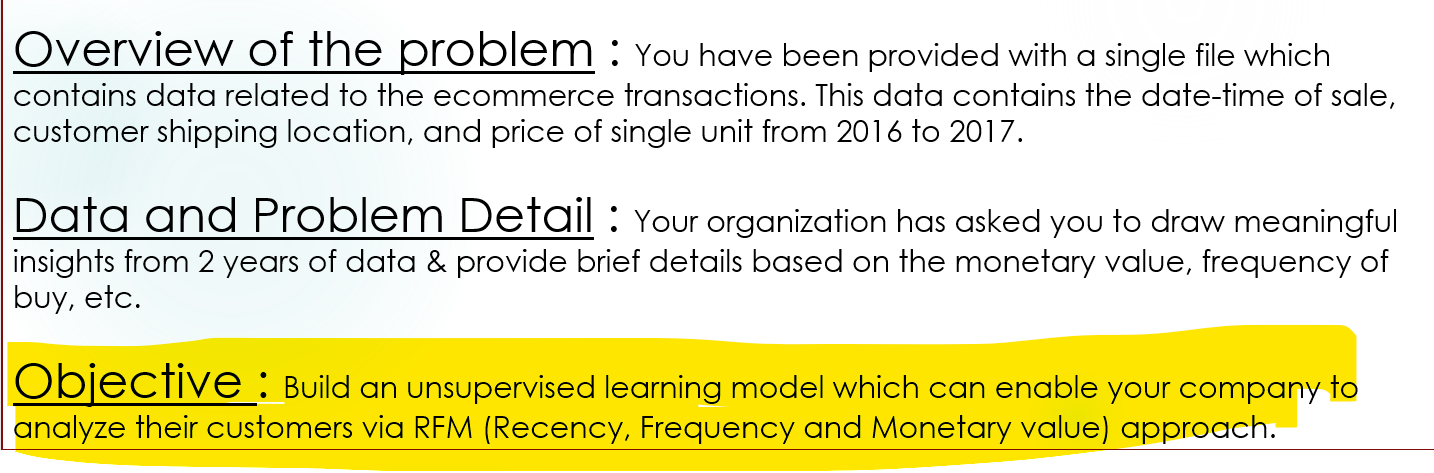

In [18]:
dataset.describe()

,CustomerID,InvoiceNo,Price
count,404181.000000,404181.000000,404181.000000
mean,2181.897630,385648.273397,2474.139920
std,1252.681271,13107.396221,4891.388347
min,2.000000,361429.000000,-10152.000000
25%,1207.000000,374194.000000,555.000000
50%,2078.000000,386937.000000,1572.000000
75%,3291.000000,397130.000000,2492.000000
max,4372.000000,406651.000000,90400.000000


In [19]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [20]:
dataset.head(10)

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177,2017-10-29,1926.0
1,4352.0,394422,2017-05-10,1740.0
2,4352.0,394422,2017-12-10,1866.0
3,4352.0,388633,2017-08-22,1869.0
4,4352.0,394422,2017-10-10,1888.0
5,4349.0,397122,2017-10-27,256.0
6,4343.0,368432,2017-02-13,-3688.0
7,4341.0,377109,2017-05-14,2031.0
8,4341.0,377109,2017-12-05,2076.0
9,4341.0,390217,2017-07-09,4020.0


In [21]:
latest_data = dt.datetime(2017,12,20)

In [22]:
latest_data

datetime.datetime(2017, 12, 20, 0, 0)

In [23]:
dataset.shape

(404181, 4)

In [24]:
dataset['CustomerID'].nunique()

4349

In [25]:
RFMScore = dataset.groupby('CustomerID').agg({'Date': lambda x : (latest_data - x.max()).days,
                                            'InvoiceNo': lambda x : x.count(),
                                            'Price' : lambda x : x.sum()})

RFMScore.rename(columns={'Date' : 'Recency', 'InvoiceNo':'Frequency','Price':'Monetory'}, inplace=True)

In [26]:
RFMScore

,Recency,Frequency,Monetory
CustomerID,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,84,151822.0
...,...,...,...
4368.0,17,10,20480.0
4369.0,181,7,10774.0
4370.0,12,13,24962.0


In [27]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,754,280608.0


In [28]:
RFMScore.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [29]:
RFMScore.Frequency.describe()

count    4349.000000
mean       92.936537
std       232.086935
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7970.000000
Name: Frequency, dtype: float64

In [30]:
RFMScore.Monetory.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetory, dtype: float64

In [31]:
# Split into Four Segment using Quantile Method
quantiles = RFMScore.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [32]:
def RScore(x, p, d):
    if x<=d[p][0.25]:
        return 1
    elif x <=d[p][0.50]:
        return 2
    elif x <=d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMScore(x, p, d):
    if x <=d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <=d[p][0.75]:
        return 2
    else:
        return 1
    

In [33]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,754,280608.0


In [34]:
RFMScore['R'] = RFMScore['Recency'].apply(RScore, args=('Recency', quantiles))
RFMScore['F'] = RFMScore['Frequency'].apply(FnMScore, args=('Frequency', quantiles))
RFMScore['M'] = RFMScore['Monetory'].apply(FnMScore, args=('Monetory', quantiles))

In [35]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,754,280608.0,1,1,1


In [36]:
RFMScore['RFMScore'] = RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)
RFMScore['RFMGroup'] = RFMScore[['R', 'M','F']].sum(axis=1)
RFMScore

,Recency,Frequency,Monetory,R,F,M,RFMScore,RFMGroup
CustomerID,,,,,,,,
2.0,4,182,553704.0,1,1,1,111,3
3.0,77,27,257404.0,4,3,1,431,8
4.0,20,72,176613.0,3,2,2,322,7
5.0,18,16,41976.0,2,4,3,243,9
6.0,9,84,151822.0,1,2,2,122,5
...,...,...,...,...,...,...,...,...
4368.0,17,10,20480.0,2,4,4,244,10
4369.0,181,7,10774.0,4,4,4,444,12
4370.0,12,13,24962.0,2,4,4,244,10


In [37]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMScore,RFMGroup
0,2.0,4,182,553704.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,322,7
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10
4345,4369.0,181,7,10774.0,4,4,4,444,12
4346,4370.0,12,13,24962.0,2,4,4,244,10
4347,4371.0,4,754,280608.0,1,1,1,111,3


In [38]:
Loyality_Level = ['Prime','Diamond','Gold','Silver']
score_cuts = pd.qcut(RFMScore.RFMGroup, q=4, labels = Loyality_Level)
RFMScore['Loyality_Level'] = score_cuts.values
RFMScore = RFMScore.reset_index()
RFMScore

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMScore,RFMGroup,Loyality_Level
0,2.0,4,182,553704.0,1,1,1,111,3,Prime
1,3.0,77,27,257404.0,4,3,1,431,8,Diamond
2,4.0,20,72,176613.0,3,2,2,322,7,Diamond
3,5.0,18,16,41976.0,2,4,3,243,9,Gold
4,6.0,9,84,151822.0,1,2,2,122,5,Prime
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10,Gold
4345,4369.0,181,7,10774.0,4,4,4,444,12,Silver
4346,4370.0,12,13,24962.0,2,4,4,244,10,Gold
4347,4371.0,4,754,280608.0,1,1,1,111,3,Prime


In [40]:
#RFMScore.to_csv("Output_file_for_RFM.csv")

# Building Algorithm - Kmeans cluster

In [42]:
dataset = RFMScore.iloc[:,1:4]
dataset.head()

,Recency,Frequency,Monetory
0,4,182,553704.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.64079551,  0.38379456,  0.3777193 ],
       [ 0.17351282, -0.28413542,  0.03204302],
       [-0.46231697, -0.09022026, -0.06221123],
       ...,
       [-0.55155624, -0.34446458, -0.23913379],
       [-0.64079551,  2.84867167,  0.0591138 ],
       [-0.1165148 , -0.09883872,  0.03836156]])

In [44]:
scaled_data = pd.DataFrame(scaled_data, index=RFMScore.index, columns=dataset.columns)
scaled_data

,Recency,Frequency,Monetory
0,-0.640796,0.383795,0.377719
1,0.173513,-0.284135,0.032043
2,-0.462317,-0.090220,-0.062211
3,-0.484627,-0.331537,-0.219285
4,-0.585021,-0.038510,-0.091133
...,...,...,...
4344,-0.495782,-0.357392,-0.244363
4345,1.333623,-0.370320,-0.255686
4346,-0.551556,-0.344465,-0.239134
4347,-0.640796,2.848672,0.059114


In [45]:
scaled_data.head()

,Recency,Frequency,Monetory
0,-0.640796,0.383795,0.377719
1,0.173513,-0.284135,0.032043
2,-0.462317,-0.090220,-0.062211
3,-0.484627,-0.331537,-0.219285
4,-0.585021,-0.038510,-0.091133


In [ ]:
KMeans(n_clusters=8, init = 'k-means++', max_iter=1000, random_state=1)

In [53]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=8)
y_kmeans = Kmeans.fit_predict(scaled_data)
y_kmeans

array([6, 1, 6, ..., 6, 5, 6])

In [54]:
pd.DataFrame(y_kmeans).value_counts()

6    2895
1     727
3     362
5     332
0      20
4       8
2       4
7       1
dtype: int64

In [55]:
dataset['Cluster'] = Kmeans.labels_

In [56]:
dataset

,Recency,Frequency,Monetory,Cluster
0,4,182,553704.0,6
1,77,27,257404.0,1
2,20,72,176613.0,6
3,18,16,41976.0,6
4,9,84,151822.0,6
...,...,...,...,...
4344,17,10,20480.0,6
4345,181,7,10774.0,1
4346,12,13,24962.0,6
4347,4,754,280608.0,5


**Customer Segmentation based on RFM Scores using K-means Clustering:**

In this notebook, our primary objective was to segment customers based on their RFM (Recency, Frequency, Monetary) scores using K-means clustering. By leveraging RFM analysis, we aimed to identify distinct customer segments characterized by their purchasing behavior and engagement with the business.

**RFM Analysis:**

I computed RFM scores for each customer, capturing the recency of their last purchase, the frequency of purchases, and the monetary value of transactions.
The RFM scores provided a comprehensive representation of each customer's purchasing habits and their overall contribution to revenue generation.

**K-means Clustering:**

Employing K-means clustering, we partitioned customers into clusters based on similarities in their RFM scores.
Through iterative optimization, K-means grouped customers into clusters with minimal within-cluster variance, maximizing the distinctiveness of each segment.
By varying the number of clusters, we explored different segmentation scenarios to identify the optimal number of segments that best capture the underlying patterns in the data.

**Segmentation Insights:**

The resulting customer segments exhibited clear distinctions in their RFM profiles, reflecting diverse purchasing patterns and engagement levels.
Each segment represented a unique cohort of customers with specific characteristics, such as high-value, loyal customers and occasional, low-spending buyers.
These segments offer actionable insights for targeted marketing strategies, personalized promotions, and customer relationship management initiatives.

**Business Implications:**

Segmenting customers based on RFM scores enables businesses to tailor marketing efforts and service offerings to meet the distinct needs and preferences of each segment.
By understanding the behaviors and preferences of different customer segments, businesses can optimize resource allocation, prioritize customer acquisition and retention efforts, and enhance overall customer satisfaction and loyalty.